In [1]:
import os
import tensorflow as tf
from util import constants
from util.config_util import get_model_params, get_task_params, get_train_params
from tf2_models.trainer import Trainer
from absl import app
from absl import flags
import numpy as np
from util.models import MODELS
from util.tasks import TASKS
from notebook_utils import *
from distill.repsim_util import *
import tensorflow_datasets as tfds
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import logging
tf.get_logger().setLevel(logging.ERROR)
from tqdm import tqdm

chkpt_dir='../tf_ckpts'

[nltk_data] Downloading package punkt to /home/dehghani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def get_outputs(model, x):
  outputs = model.detailed_call(x, training=tf.convert_to_tensor(True))
  logits, reps = outputs[0], outputs[model.rep_index]
  if model.rep_layer is not None and model.rep_layer is not -1:
    reps = reps[model.rep_layer]

  return reps, logits

In [3]:
def convert_examples(examples):
    pad_length = int((28 - 28) / 2)
    return tf.pad(tf.cast(examples['image'], dtype=tf.float32) / 255,
                  ([pad_length, pad_length], [pad_length, pad_length],
                   [0, 0])), tf.cast(
      examples['label'], dtype=tf.int32)

cmnist_trans = tfds.load('mnist_corrupted/translate', split='test')
cmnist_trans = cmnist_trans.map(map_func=lambda x: convert_examples(x))
cmnist_trans = cmnist_trans.batch(64)

task1 = 'mnist'
task1 = TASKS[task1](get_task_params(), data_dir='../data')
cl_token = 0

task = task1

models = []
labels = []

In [4]:
cmnist_trans = tfds.builder('mnist_corrupted/translate')
cmnist_trans_test = cmnist_trans.as_dataset(split='test')
cmnist_trans_test = cmnist_trans_test.map(map_func=lambda x: convert_examples(x))
cmnist_trans_test = cmnist_trans_test.batch(200)
int(cmnist_trans.info.splits['test'].num_examples / 200)

50

In [5]:
cmnist_scale = tfds.builder('mnist_corrupted/scale')
cmnist_scale_test = cmnist_scale.as_dataset(split='test')
cmnist_scale_test = cmnist_scale_test.map(map_func=lambda x: convert_examples(x))
cmnist_scale_test = cmnist_scale_test.batch(200)
int(cmnist_scale.info.splits['test'].num_examples / 200)

50

In [6]:
## CNN -> FF
###############################1
config={'student_exp_name':'gc_o_std10',
        'teacher_exp_name':'gc_o_dtchr10',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist7',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ot10_std10, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t10, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([cnn_t10, cnn2ff_ot10_std10])
# labels.extend(['cnn_t10', 'cnn2ff_ot10_std10'])
#**********offline
config['student_exp_name'] ='gc_f_std10'
config['teacher_exp_name'] ='gc_o_dtchr10'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ft10_std10, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t10, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t10, cnn2ff_ft10_std10])
labels.extend(['cnn_t10', 'cnn2ff_ft1_std10'])
###############################2
config['student_exp_name'] ='gc_o_std11'
config['teacher_exp_name'] ='gc_o_dtchr11'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ot11_std11, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t11, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([cnn_t11, cnn2ff_ot11_std11])
# labels.extend(['cnn_t11', 'cnn2ff_ot11_std11'])
#**********offline
config['student_exp_name'] ='gc_f_std11'
config['teacher_exp_name'] ='gc_o_dtchr11'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ft11_std11, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t11, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn_t11, cnn2ff_ft11_std11])
labels.extend(['cnn_t11', 'cnn2ff_ft11_std11'])
###############################3
config['student_exp_name'] ='gc_o_std12'
config['teacher_exp_name'] ='gc_o_dtchr12'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ot12_std12, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t12, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([cnn_t12, cnn2ff_ot12_std12])
# labels.extend(['cnn_t12', 'cnn2ff_ot12_std12'])
#**********offline
config['student_exp_name'] ='gc_f_std12'
config['teacher_exp_name'] ='gc_o_dtchr12'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ft12_std12, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t12, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn_t12, cnn2ff_ft12_std12])
labels.extend(['cnn_t12', 'cnn2ff_ft12_std12'])
###############################4
config['student_exp_name'] ='gc_o_std13'
config['teacher_exp_name'] ='gc_o_dtchr13'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ot13_std13, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t13, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([cnn_t13, cnn2ff_ot13_std13])
# labels.extend(['cnn_t13', 'cnn2ff_ot13_std13'])
#**********offline
config['student_exp_name'] ='gc_f_std13'
config['teacher_exp_name'] ='gc_o_dtchr13'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ft13_std13, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t13, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t13, cnn2ff_ft13_std13])
labels.extend(['cnn_t13', 'cnn2ff_ft13_std13'])

model config: ff_mnist4
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr10_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_f_std10
Restored student from ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr10_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_f_std10/ckpt-400
Restored student from ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr10/ckpt-400
model config: ff_mnist4
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr11_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_f_std11
Restored student from ../tf_ckp

In [7]:
#CNN -> CNN
###############################1
config={'student_exp_name':'gc_o_std18',
        'teacher_exp_name':'gc_o_tchr18',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vcnn',
        'teacher_config':'vcnn_mnist7',
        'student_config':'vcnn_mnist7',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2cnn_ot18_std18, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t18, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t18, cnn2cnn_ot18_std18])
# labels.extend(['cnn_t18', 'cnn2cnn_ft18_std18'])

#**********offline
config['student_exp_name'] ='gc_f_std18'
config['teacher_exp_name'] ='gc_o_tchr18'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2cnn_ft18_std18, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t18, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t18, cnn2cnn_ft18_std18])
labels.extend(['cnn_t18', 'cnn2cnn_ft18_std18'])
###############################2
config['student_exp_name'] ='gc_o_std17'
config['teacher_exp_name'] ='gc_o_tchr17'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2cnn_ot17_std17, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t17, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t17, cnn2cnn_ot17_std17])
# labels.extend(['cnn_t17', 'cnn2cnn_ft17_std17'])
#**********offline
config['student_exp_name'] ='gc_f_std17'
config['teacher_exp_name'] ='gc_o_tchr17'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2cnn_ft17_std17, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t17, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t17, cnn2cnn_ft17_std17])
labels.extend(['cnn_t17', 'cnn2cnn_ft17_std17'])

###############################3
config['student_exp_name'] ='gc_o_std16'
config['teacher_exp_name'] ='gc_o_tchr16'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2cnn_ot16_std16, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t16, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([cnn_t16, cnn2cnn_ot16_std16])
# labels.extend(['cnn_t16', 'cnn2cnn_ft16_std16'])
#**********offline
config['student_exp_name'] ='gc_f_std16'
config['teacher_exp_name'] ='gc_o_tchr16'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

cnn2cnn_ft16_std16, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t16, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t16, cnn2cnn_ft16_std16])
labels.extend(['cnn_t16', 'cnn2cnn_ft16_std16'])
###############################4
config['student_exp_name'] ='gc_o_std15'
config['teacher_exp_name'] ='gc_o_tchr15'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2cnn_ot15_std15, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t15, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t15, cnn2cnn_ot15_std15])
# labels.extend(['cnn_t15', 'cnn2cnn_ot15_std15'])

#**********offline
config['student_exp_name'] ='gc_f_std15'
config['teacher_exp_name'] ='gc_o_tchr15'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2cnn_ft15_std15, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t15, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t15, cnn2cnn_ft15_std15])
labels.extend(['cnn_t15', 'cnn2cnn_ft15_std15'])

model config: vcnn_mnist7
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr18_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_f_std18
Restored student from ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr18_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_f_std18/ckpt-11
Restored student from ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr18/ckpt-11
model config: vcnn_mnist7
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr17_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_f_std17
Restored 

In [8]:
#FF -> CNN
###############################1
config={'student_exp_name':'gc_o_std100',
        'teacher_exp_name':'gc_o_dtchr100',
        'task_name':'mnist',
        'teacher_model':'cl_vff',
        'student_model':'cl_vcnn',
        'teacher_config':'ff_mnist4',
        'student_config':'vcnn_mnist7',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2cnn_ot100_std100, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t100, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t100, ff2cnn_ot100_std100])
# labels.extend(['ff_t100', 'ff2cnn_ot100_std100'])
#**********offline
config['student_exp_name'] ='gc_f_std100'
config['teacher_exp_name'] ='gc_o_dtchr100'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2cnn_ft100_std100, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t100, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t100, ff2cnn_ft100_std100])
labels.extend(['ff_t100', 'ff2cnn_ft100_std100'])
###############################2
config['student_exp_name'] ='gc_o_std101'
config['teacher_exp_name'] ='gc_o_tchr101'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

# ff2cnn_ot101_std101, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t101, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t101, ff2cnn_ot101_std101])
# labels.extend(['ff_t101', 'ff2cnn_ot101_std101'])


#**********offline
config['student_exp_name'] ='gc_f_std101'
config['teacher_exp_name'] ='gc_o_tchr101'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2cnn_ft101_std101, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t101, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t101, ff2cnn_ft101_std101])
labels.extend(['ff_t101', 'ff2cnn_ft101_std101'])

###############################3
config['student_exp_name'] ='gc_o_std102'
config['teacher_exp_name'] ='gc_o_tchr102'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2cnn_ot102_std102, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t102, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t102, ff2cnn_ot102_std102])
# labels.extend(['ff_t102', 'ff2cnn_ot102_std102'])

#**********offline
config['student_exp_name'] ='gc_f_std102'
config['teacher_exp_name'] ='gc_o_tchr102'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

ff2cnn_ft102_std102, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t102, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t102, ff2cnn_ft102_std102])
labels.extend(['ff_t102', 'ff2cnn_ft102_std102'])
###############################4
config['student_exp_name'] ='gc_o_std103'
config['teacher_exp_name'] ='gc_o_tchr103'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2cnn_ot103_std103, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t103, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t103, ff2cnn_ot103_std103])
# labels.extend(['ff_t103', 'ff2cnn_ot103_std103'])
#**********offline
config['student_exp_name'] ='gc_f_std103'
config['teacher_exp_name'] ='gc_o_tchr103'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2cnn_ft103_std103, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t103, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t103, ff2cnn_ft103_std103])
labels.extend(['ff_t103', 'ff2cnn_ft103_std103'])

model config: vcnn_mnist7
model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr100_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_f_std100
Restored student from ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr100_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_f_std100/ckpt-11
Restored student from ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr100/ckpt-11
model config: vcnn_mnist7
model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr101_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_f_std101
Restored student from ../tf_ckpts/mnist

In [9]:
##ff -> ff
###############################1
config={'student_exp_name':'gc_o_std210',
        'teacher_exp_name':'gc_o_dtchr210',
        'task_name':'mnist',
        'teacher_model':'cl_vff',
        'student_model':'cl_vff',
        'teacher_config':'ff_mnist4',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ot1_std1, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


# models.extend([ff2ff_ot1_std1, ff_t1])
# labels.extend(['ff2ffot1_std1', 'ff_t1'])

#**********offline
config['student_exp_name'] ='gc_f_std210'
config['teacher_exp_name'] ='gc_o_dtchr210'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ft1_std1, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([ff2ff_ft1_std1, ff_t1])
labels.extend(['ff2ff_ft1_std1', 'ff_t1'])
print('student perf:')
print(ff2ff_ft1_std1.evaluate(task.test_dataset, steps=10))
print('teacher perf:')
print(ff_t1.evaluate(task.test_dataset, steps=10))
###############################2
config['student_exp_name'] ='gc_o_std211'
config['teacher_exp_name'] ='gc_o_dtchr211'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ot2_std2, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


# models.extend([ff2ff_ot2_std2, ff_t2])
# labels.extend(['ff2ff_ot2_std2', 'ff_t2'])
#**********offline
config['student_exp_name'] ='gc_f_std211'
config['teacher_exp_name'] ='gc_o_dtchr211'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ft2_std2, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([ff2ff_ft2_std2, ff_t2])
labels.extend(['ff2ff_ft2_std2', 'ff_t2'])
print('student perf:')
print(ff2ff_ft2_std2.evaluate(task.test_dataset, steps=10))
print('teacher perf:')
print(ff_t2.evaluate(task.test_dataset, steps=10))
###############################3
config['student_exp_name'] ='gc_o_std212'
config['teacher_exp_name'] ='gc_o_dtchr212'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ot3_std3, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t3, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


# models.extend([ff2ff_ot3_std3, ff_t3])
# labels.extend(['ff2ff_ot3_std3', 'ff_t3'])


#**********offline
config['student_exp_name'] ='gc_f_std212'
config['teacher_exp_name'] ='gc_o_dtchr212'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ft3_std3, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t3, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([ff2ff_ft3_std3, ff_t3])
labels.extend(['ff2ff_ft3_std3', 'ff_t3'])
print('student perf:')
print(ff2ff_ft3_std3.evaluate(task.test_dataset, steps=10))
print('teacher perf:')
print(ff_t3.evaluate(task.test_dataset, steps=10))
###############################4
config['student_exp_name'] ='gc_o_std202'
config['teacher_exp_name'] ='gc_o_tchr202'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ot4_std4, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t4, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff2ff_ot4_std4, ff_t4])
# labels.extend(['ff2ff_ot4_std4', 'ff_t4'])


#**********offline
config['student_exp_name'] ='gc_f_std220'
config['teacher_exp_name'] ='gc_o_dtchr210'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ft4_std4, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t4, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


models.extend([ff2ff_ft4_std4, ff_t4])
labels.extend(['ff2ff_ft4_std4', 'ff_t4'])
print('student perf:')
print(ff2ff_ft4_std4.evaluate(task.test_dataset, steps=10))
print('teacher perf:')
print(ff_t4.evaluate(task.test_dataset, steps=10))

model config: ff_mnist4
model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr210_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_f_std210
Restored student from ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr210_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_f_std210/ckpt-400
Restored student from ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr210/ckpt-400
student perf:
10/10 [==============================] - 1s 54ms/step - loss: 0.0614 - classification_loss: 0.0602 - sparse_categorical_accuracy: 0.9844
[0.06137826113263145, 0.060237635, 0.984375]
teacher perf:
10/10 [==============================] - 0s 22ms/step - loss: 0.0661 - classification_loss: 0.0467 - sparse_categorical_accuracy: 0.9859
[0.0660534

In [10]:
# models = [#std_ff_r0, std_ff_r1, std_ff_r2, 
#           #std_ff4, 
#          #std_f4_ff1, std_f5_ff1, std_f6_ff1,
#          std_f100_ff1, std_f110_ff1, std_f101_ff1, std_f111_ff1, std_f102_ff1, std_f112_ff1,
#          std_f100_ff2,
#          std_f210_ff1, std_f211_ff1, std_f212_ff1,
#          std_f210_ff2, std_f211_ff2, std_f212_ff2,
#          #tchr_rsnt_r0, tchr_rsnt_r1, tchr_rsnt_r2, 
#          # tchr_rsnt4, 
#          tchr_ff210, tchr_ff211, tchr_ff212,
#          tchr_rsnt100, tchr_rsnt110, tchr_rsnt101,  tchr_rsnt111, tchr_rsnt102, tchr_rsnt112
#          #tchr_rsnt3
#         ]
# labels = [#'std_ff_r0', 'std_ff_r1', 'std_ff_r2', 
#           #'std_ff4', 
#           #'std_f4_ff1', 'std_f5_ff1', 'std_f6_ff1',
#           'std_f100_ff1', 'std_f110_ff1', 'std_f101_ff1', 'std_f111_ff1', 'std_f102_ff1', 'std_f112_ff1',
#          'std_f100_ff2',
#          'std_f210_ff1', 'std_f211_ff1', 'std_f212_ff1',
#          'std_f210_ff2', 'std_f211_ff2', 'std_f212_ff2', 
#           #'tchr_ff_r0', 'tchr_rsnt_r1', 'tchr_rsnt_r2', 
#           #'tchr_rsnt4', 
#           'tchr_ff210', 'tchr_ff211', 'tchr_ff212',
#          'tchr_rsnt100', 'tchr_rsnt110', 'tchr_rsnt101',  'tchr_rsnt111', 'tchr_rsnt102', 'tchr_rsnt112'
#           #'tchr_rsnt3'
#          ]

for x, y in task.valid_dataset:
    for i, (l, model) in enumerate(zip(labels,models)):
        print(i, l)
        print(model.model_name)
        model(x)
    break

0 cnn_t10
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
1 cnn2ff_ft1_std10
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
2 cnn_t11
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
3 cnn2ff_ft11_std11
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
4 cnn_t12
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
5 cnn2ff_ft12_std12
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
6 cnn_t13
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
7 cnn2ff_ft13_std13
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
8 cnn_t18
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
9 cnn2cnn_ft18_std18
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
10 cnn_t17
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
11 cnn2cnn_ft17_std17
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
12 cnn_t16
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
13 cnn2cnn_ft16_std16
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
14 cnn_t15
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
15 cnn2cnn_ft15_std15
cl_vcnn_hc

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

def project2d(reploss_dic, dist_lists):
    dists = []
    cities = []
    for i in np.arange(len(dist_lists.keys())):
        k = list(dist_lists.keys())[i]
        cities.append(k)
        dists.append(list(map(float , dist_lists[k])))

    adist = np.array(dists)
    amax = np.amax(adist)
    adist /= amax

    mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=12345)
    results = mds.fit(adist)

    coords = results.embedding_

    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        coords[:, 0], coords[:, 1], marker = 'o'
        )
    for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
        plt.annotate(
            label,
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    plt.show()
    
    return results.embedding_, cities

In [12]:
def get_error_overlap(models, data, batch_count):
    models_preds = {}
    for i in np.arange(len(models)):
        models_preds[i] = []

    y_trues = []
    inputs = []
    for x, y in tqdm(data, total=batch_count):
        for i in np.arange(len(models)): 
            model_pred = tf.argmax(models[i](x, training=False), axis=-1)
            models_preds[i].extend(model_pred.numpy())

        y_trues.extend(y.numpy())
        inputs.extend(x)
        batch_count -= 1
        if batch_count == 0:
            break
            
    return models_preds, y_trues, inputs

In [13]:
Mz =models
Lz = labels
models_preds , y_trues, inputs = get_error_overlap(Mz,cmnist_trans_test,
                                                   int(cmnist_trans.info.splits['test'].num_examples / 200))
#trans_Ez, trans_Lz = project2d(reploss_dic, dist_lists)

 98%|█████████▊| 49/50 [00:15<00:00,  3.25it/s]

In [14]:
models_mistakes = {}
models_mistakes_indexes = {}
for i in np.arange(len(Mz)):
    models_mistakes[i] = np.asarray(models_preds[i]) == np.asarray(y_trues)
    models_mistakes_indexes[i] = set(np.where(models_mistakes[i] == False)[0])



In [15]:

for i in np.arange(len(Mz)):
    print(Lz[i], len(models_mistakes_indexes[i]))

cnn_t10 183
cnn2ff_ft1_std10 4983
cnn_t11 184
cnn2ff_ft11_std11 4903
cnn_t12 183
cnn2ff_ft12_std12 4707
cnn_t13 190
cnn2ff_ft13_std13 5031
cnn_t18 228
cnn2cnn_ft18_std18 219
cnn_t17 190
cnn2cnn_ft17_std17 223
cnn_t16 194
cnn2cnn_ft16_std16 215
cnn_t15 194
cnn2cnn_ft15_std15 222
ff_t100 6289
ff2cnn_ft100_std100 232
ff_t101 6105
ff2cnn_ft101_std101 227
ff_t102 6221
ff2cnn_ft102_std102 253
ff_t103 6372
ff2cnn_ft103_std103 231
ff2ff_ft1_std1 6035
ff_t1 6154
ff2ff_ft2_std2 6142
ff_t2 6442
ff2ff_ft3_std3 6003
ff_t3 6346
ff2ff_ft4_std4 6080
ff_t4 6154


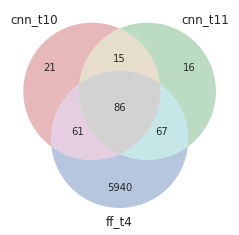

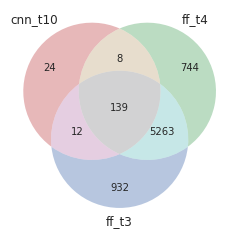

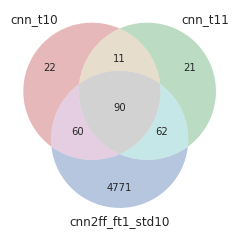

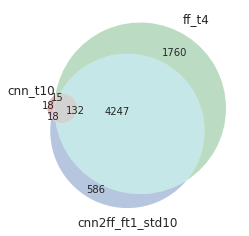

In [16]:
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted

sets = {}
for i in [0,2,31]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3_unweighted(sets.values(), sets.keys())
plt.show()

sets = {}
for i in [0,31,29]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3_unweighted(sets.values(), sets.keys())
plt.show()


sets = {}
for i in [0,2,1]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3_unweighted(sets.values(), sets.keys())
plt.show()


sets = {}
for i in [0,31,1]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3(sets.values(), sets.keys())
plt.show()



  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:00<00:21,  2.33it/s]

  4%|▍         | 2/50 [00:00<00:18,  2.57it/s]

  6%|▌         | 3/50 [00:01<00:17,  2.75it/s]

  8%|▊         | 4/50 [00:01<00:15,  2.88it/s]

 10%|█         | 5/50 [00:01<00:15,  3.00it/s]

 12%|█▏        | 6/50 [00:01<00:14,  3.08it/s]

 14%|█▍        | 7/50 [00:02<00:13,  3.15it/s]

 16%|█▌        | 8/50 [00:02<00:13,  3.18it/s]

 18%|█▊        | 9/50 [00:02<00:12,  3.23it/s]

 20%|██        | 10/50 [00:03<00:12,  3.28it/s]

 22%|██▏       | 11/50 [00:03<00:11,  3.28it/s]

 24%|██▍       | 12/50 [00:03<00:11,  3.27it/s]

 26%|██▌       | 13/50 [00:04<00:11,  3.29it/s]

 28%|██▊       | 14/50 [00:04<00:10,  3.31it/s]

 30%|███       | 15/50 [00:04<00:10,  3.32it/s]

 32%|███▏      | 16/50 [00:04<00:10,  3.34it/s]

 34%|███▍      | 17/50 [00:05<00:09,  3.33it/s]

 36%|███▌      | 18/50 [00:05<00:09,  3.34it/s]

 38%|███▊      | 19/50 [00:05<00:09,  3.32it/s]

 40%|████      | 20/50 [00:06<00:09,

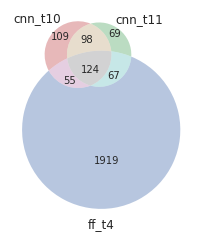

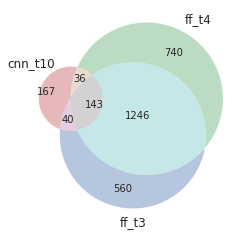

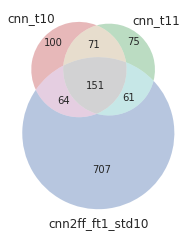

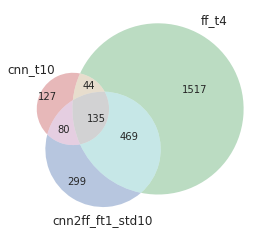

In [18]:
Mz =models
Lz = labels
models_preds , y_trues, inputs = get_error_overlap(Mz,cmnist_scale_test,
                                                   int(cmnist_scale.info.splits['test'].num_examples / 200))

models_mistakes = {}
models_mistakes_indexes = {}
for i in np.arange(len(Mz)):
    models_mistakes[i] = np.asarray(models_preds[i]) == np.asarray(y_trues)
    models_mistakes_indexes[i] = set(np.where(models_mistakes[i] == False)[0])


from matplotlib_venn import venn3, venn3_circles, venn3_unweighted

sets = {}
for i in [0,2,31]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3(sets.values(), sets.keys())
plt.show()

sets = {}
for i in [0,31,29]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3(sets.values(), sets.keys())
plt.show()


sets = {}
for i in [0,2,1]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3(sets.values(), sets.keys())
plt.show()


sets = {}
for i in [0,31,1]:
    sets[Lz[i]] = models_mistakes_indexes[i]

venn3(sets.values(), sets.keys())
plt.show()

In [ ]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, cmnist_scale_test, repindex=1)
scale_Ez, scale_Lz = project2d(reploss_dic, dist_lists)

In [ ]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, cmnist_trans_test, repindex=0)
project2d(reploss_dic, dist_lists)

In [ ]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, cmnist_scale_test, repindex=0)
project2d(reploss_dic, dist_lists)

In [ ]:
for model,label in zip(models,labels):
    print(label)
    results = model.evaluate(cmnist_trans_test, steps=cmnist_trans.info.splits['test'].num_examples / 64)
    print(results)

In [ ]:
for model,label in zip(models,labels):
    print(label)
    results = model.evaluate(cmnist_scale_test, steps=cmnist_scale.info.splits['test'].num_examples / 64)
    print(results)

In [ ]:
for model,label in zip(models,labels):
    print(label)
    results = model.evaluate(task.test_dataset, steps=task.n_test_batches)
    print(results)

In [ ]:
import tensorflow_probability as tfp

for model,label in zip(models,labels):
    print(label)
    print(model.model_name)

    model_accuracy, predicted_class_probs, correct_class_probs, model_logits, model_trues= test_for_calibration(model, cmnist_scale_test, cmnist_scale.info.splits['test'].num_examples / 64, task, n_bins=20)

    #print(len(model_accuracy))
    #print(len(predicted_class_probs))
    ##plot_calibration(model_accuracy, predicted_class_probs, correct_class_probs, n_bins=20)
    plt.show()
    model_ece = tfp.stats.expected_calibration_error(
        1000000,
        logits=model_logits,
        labels_true=model_trues,
    )
    print(model_ece.numpy())
    
    print("#######################")

In [ ]:
for c,l in zip(ff_lz,ff_ez):
    print(l.split('_')[0],'\t',l, '\t',c[0], '\t',c[1])

In [ ]:
config={'student_exp_name':'gc_o_std300',
        'teacher_exp_name':'gc_o_tchr300',
        'task_name':'mnist',
        'teacher_model':'cl_vff',
        'student_model':'cl_vff',
        'teacher_config':'ff_mnist4',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

teacher_model = MODELS[config['teacher_model']](hparams=tchr_hparams, cl_token=cl_token)

   
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                              '_'.join([teacher_model.model_name, config['teacher_config'],config['teacher_exp_name']]))
tchr_ckpt = tf.train.Checkpoint(net=teacher_model)
teacher_manager = tf.train.CheckpointManager(tchr_ckpt, ckpt_dir, max_to_keep=None)
teacher_manager.latest_checkpoint

student_model = MODELS[config['student_model']](hparams=std_hparams, cl_token=cl_token)
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                          '_'.join([config['distill_mode'],config['distill_config'],
                                    "teacher", teacher_model.model_name, 
                                    config['teacher_config'],
                                    config['teacher_exp_name'],
                                   "student",student_model.model_name,
                                    str(config['student_config']),
                                    config['student_exp_name']]))
print("student_checkpoint:", ckpt_dir)
std_ckpt = tf.train.Checkpoint(net=student_model)
student_manager = tf.train.CheckpointManager(std_ckpt, ckpt_dir, max_to_keep=None)


In [ ]:
print(student_manager.latest_checkpoint)
for ck in student_manager.checkpoints:
    std_ckpt.restore(ck)
    #print("#######", ck, "########")
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    trans = student_model.evaluate(cmnist_trans_test, steps=cmnist_trans.info.splits['test'].num_examples / 64, verbose=3)
    scale = student_model.evaluate(cmnist_scale_test, steps=cmnist_scale.info.splits['test'].num_examples / 64, verbose=3)
    mnist = student_model.evaluate(task.test_dataset, steps=task.n_test_batches, verbose=3)
    print(trans[-1], scale[-1], mnist[-1])

In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy
print(student_manager.latest_checkpoint)
Mz = []
Lz = []
# for i, ck in enumerate(student_manager.checkpoints):
#     std_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(copy(student_model))
#     Lz.append('ff2ff'+str(i))
    
    
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(copy(teacher_model))
    Lz.append('ff'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
ff_lz, ff_ez = project2d(reploss_dic, dist_lists)

In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy
print(student_manager.latest_checkpoint)
# Mz = []
# Lz = []
for i, ck in enumerate(student_manager.checkpoints):
    std_ckpt.restore(ck)
    print("#######", ck, "########", i)
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(copy(student_model))
    Lz.append('ff2ff'+str(i))
    
    
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(copy(teacher_model))
    Lz.append('ff'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
project2d(reploss_dic, dist_lists)

In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy
print(student_manager.latest_checkpoint)
# Mz = []
# Lz = []
# for i, ck in enumerate(student_manager.checkpoints):
#     std_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(copy(student_model))
#     Lz.append('ff2ff'+str(i))
    
    
    
# for i, ck in enumerate(teacher_manager.checkpoints):
#     tchr_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(copy(teacher_model))
#     Lz.append('ff'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
project2d(reploss_dic, dist_lists)

In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy

print(student_manager.latest_checkpoint)
Mz = []
Lz = []
for i, ck in enumerate(student_manager.checkpoints):
    std_ckpt.restore(ck)
    print("#######", ck, "########", i)
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(student_model))
    Lz.append('cnn2ff'+str(i))
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(teacher_model))
    Lz.append('cnn'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, task.valid_dataset, repindex=1)
project2d(reploss_dic, dist_lists)

In [ ]:
Mz = []
Lz = []
# for i, ck in enumerate(student_manager.checkpoints):
#     std_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(deepcopy(student_model))
#     Lz.append('ff2cnn'+str(i))
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(teacher_model))
    Lz.append('cnn'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
cnn_lz, cnn_ez = project2d(reploss_dic, dist_lists)

In [ ]:
from copy import deepcopy
Mz = []
Lz = []
for i, ck in enumerate(student_manager.checkpoints):
    std_ckpt.restore(ck)
    print("#######", ck, "########", i)
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(student_model))
    Lz.append('cnn2ff'+str(i))
    
# for i, ck in enumerate(teacher_manager.checkpoints):
#     tchr_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(deepcopy(teacher_model))
#     Lz.append('cnn'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
cnn2ff_lz, cnn2ff_ez = project2d(reploss_dic, dist_lists)

In [ ]:
print(teacher_manager.latest_checkpoint)
for ck in teacher_manager.checkpoints:
    tchr_ckpt.restore(ck)
    #print("#######", ck, "########")
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    trans = teacher_model.evaluate(cmnist_trans_test, steps=cmnist_trans.info.splits['test'].num_examples / 64, verbose=3)
    scale = teacher_model.evaluate(cmnist_scale_test, steps=cmnist_scale.info.splits['test'].num_examples / 64, verbose=3)
    mnist = teacher_model.evaluate(task.test_dataset, steps=task.n_test_batches, verbose=3)
    print(trans[-1], scale[-1], mnist[-1])

In [ ]:
config={'student_exp_name':'gc_f_std1000',
        'teacher_exp_name':'gc_o_dtchr1000',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist7',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl5_4_crs_slw_3',
        'distill_mode':'offline',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

teacher_model = MODELS[config['teacher_model']](hparams=tchr_hparams, cl_token=cl_token)

   
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                              '_'.join([teacher_model.model_name, config['teacher_config'],config['teacher_exp_name']]))
tchr_ckpt = tf.train.Checkpoint(net=teacher_model)
teacher_manager = tf.train.CheckpointManager(tchr_ckpt, ckpt_dir, max_to_keep=None)
teacher_manager.latest_checkpoint

student_model = MODELS[config['student_model']](hparams=std_hparams, cl_token=cl_token)
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                          '_'.join([config['distill_mode'],config['distill_config'],
                                    "teacher", teacher_model.model_name, 
                                    config['teacher_config'],
                                    config['teacher_exp_name'],
                                   "student",student_model.model_name,
                                    str(config['student_config']),
                                    config['student_exp_name']]))
print("student_checkpoint:", ckpt_dir)
std_ckpt = tf.train.Checkpoint(net=student_model)
student_manager = tf.train.CheckpointManager(std_ckpt, ckpt_dir, max_to_keep=None)


In [ ]:
import tensorflow_probability as tfp


model_accuracy, predicted_class_probs, correct_class_probs, model_logits, model_trues= test_for_calibration(teacher_model,cmnist_trans, cmnist_trans.info.splits['test'].num_examples / 64, task, n_bins=20)

print(len(model_accuracy))
print(len(predicted_class_probs))
plot_calibration(model_accuracy, predicted_class_probs, correct_class_probs, n_bins=20)
plt.show()
model_ece = tfp.stats.expected_calibration_error(
    1000000,
    logits=model_logits,
    labels_true=model_trues,
)
print(model_ece.numpy())

In [ ]:
def test_for_calibration(model, data, batch_count, task, n_bins=10):
    preds = []
    correct_class_probs = []
    predicted_class_probs = []
    pred_logits = []
    y_trues = []
    for x, y in data:
        logits = model(x)
        pred_logits.extend(logits.numpy())
        pred = tf.argmax(logits, axis=-1)
        
        prob = task.get_probs_fn()(logits, labels=y, temperature=1)
        preds.extend(pred.numpy())
        y_trues.extend(y.numpy())
        batch_indexes = tf.cast(tf.range(len(y), dtype=tf.int32), dtype=tf.int32)
        true_indexes = tf.concat([batch_indexes[:,None], y[:,None]], axis=1)
        pred_indexes = tf.concat([batch_indexes[:,None], tf.cast(pred[:,None], tf.int32)], axis=1)

        correct_class_probs.extend(tf.gather_nd(prob, true_indexes).numpy())
        predicted_class_probs.extend(tf.gather_nd(prob, pred_indexes).numpy())

        batch_count -= 1
        if batch_count == 0:
            break

    model_accuracy = np.asarray(preds) == np.asarray(y_trues)

    return model_accuracy, predicted_class_probs, correct_class_probs, pred_logits, y_trues

def plot_calibration(model_accuracy, predicted_class_probs, correct_class_probs, n_bins=10):
    p_confidence_bins = np.zeros(n_bins+1)
    n_confidence_bins = np.zeros(n_bins+1)
    total_confidence_bins = np.zeros(n_bins+1)
    
    denominator = 100.0 / n_bins
    for i in np.arange(len(model_accuracy)):
        if model_accuracy[i]:
            p_confidence_bins[int(predicted_class_probs[i]*100 / denominator)] += 1.0
        else:
            n_confidence_bins[int(predicted_class_probs[i]*100 / denominator)] -= 1.0
        total_confidence_bins[int(predicted_class_probs[i]*100 / denominator)] += 1

    #sns.stripplot(model_accuracy,predicted_class_probs, color='blue', alpha=0.5, jitter=True)
    #sns.stripplot(model_accuracy,correct_class_probs, color='green', alpha=0.2, jitter=True)
    #sns.swarmplot(model_accuracy,predicted_class_probs, color='blue', alpha=0.5)
    #plt.show()
   
    sns.barplot(x=np.arange(0,n_bins+1)*denominator, 
                y=np.arange(0,n_bins+1)/n_bins, 
                color='green', alpha=0.2, edgecolor='black')
    ax = sns.barplot(x=np.arange(0,n_bins+1)*denominator, 
                    y=p_confidence_bins/total_confidence_bins, 
                    color='red', alpha=0.5, edgecolor='black')
    
    x_ticks = np.arange(0,n_bins,2)
    x_tick_labels = x_ticks / np.float32(n_bins)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, fontsize=10)
    
def expected_calibration_error(teacher_accuracy, teacher_predicted_class_probs):
    raise NotImplemented